In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
df = pd.read_csv('german_credit.csv')
df.head(5)



,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df.loc[:, df.dtypes == object].head(5)

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first
df.shape

(1000, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Print Shape of model data
df1 = pd.get_dummies(df)
df1.shape


(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

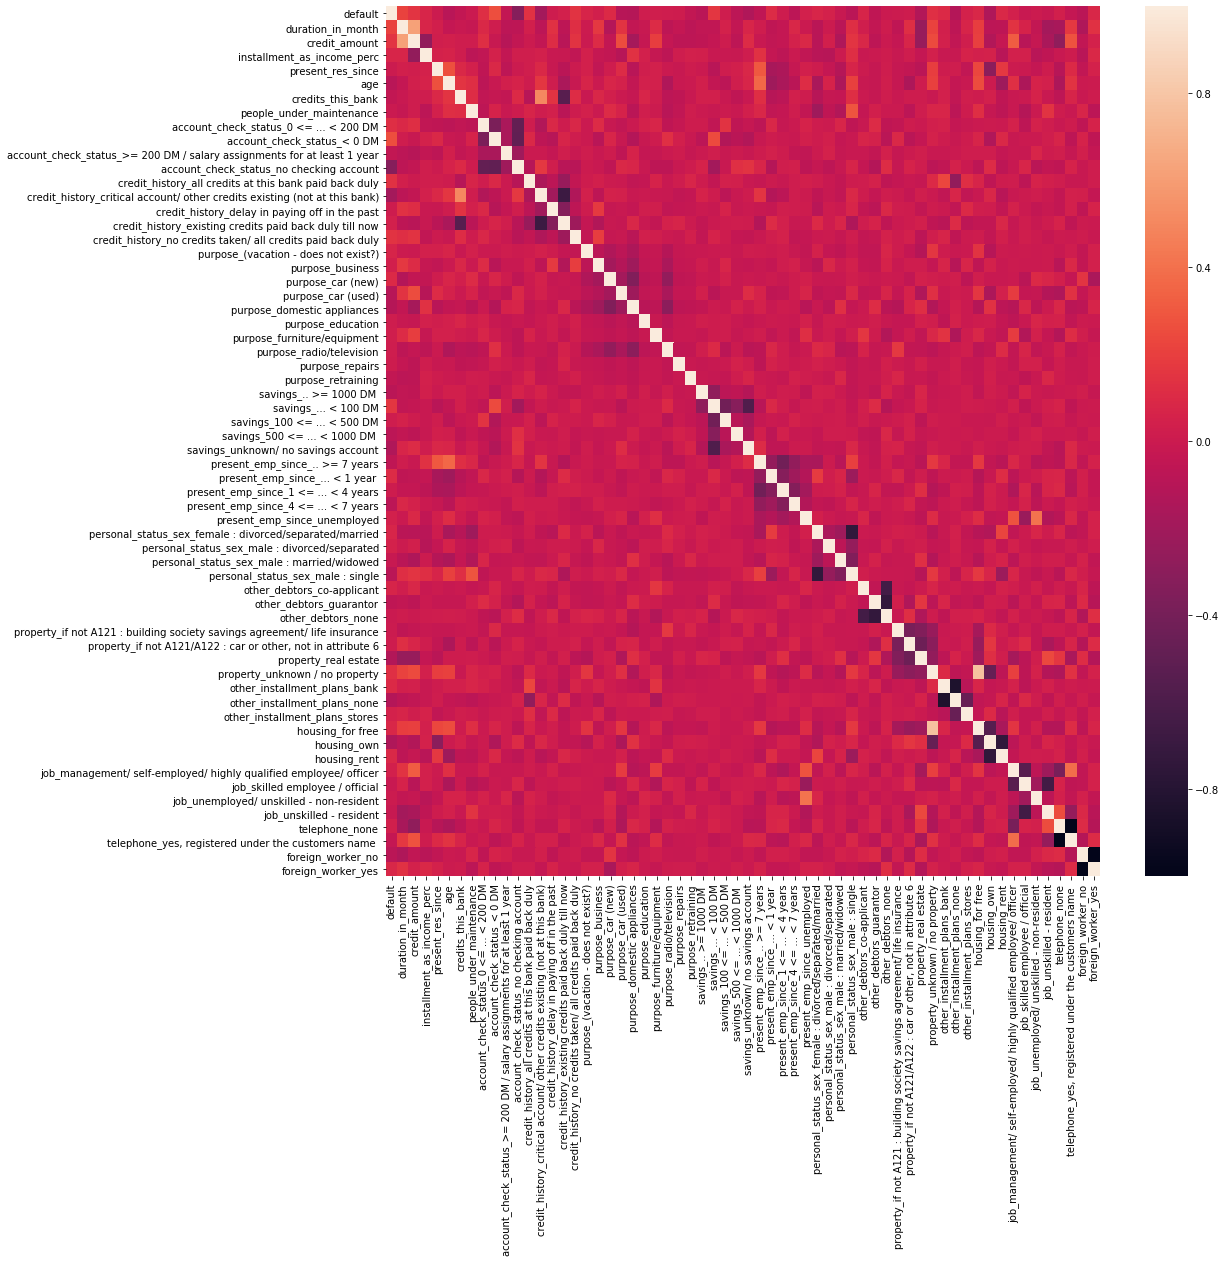

In [7]:
corr = df1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr)

### Drop the original variables which are converted to dummy

In [8]:
df1.head(5)
df1.info()
#not dropping any column as none of them are repetitive in nature.(please, correct me if i am wrong)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X = pd.DataFrame(df1.iloc[:,1:62])
y = pd.DataFrame(df1['default'])
test_size = 0.3
seed = 8
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=test_size,random_state=seed)

In [10]:
X.head(1)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [12]:
from sklearn import metrics
y_predict = model.predict(X_test)
print (metrics.confusion_matrix(y_test,y_predict))


[[197  13]
 [ 52  38]]


In [13]:
model.score(X_test,y_test)

0.7833333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [37]:
importance = (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns))
importance.sort_values(['Imp'], ascending=False)


,Imp
credit_amount,0.105423
duration_in_month,0.091784
age,0.077134
account_check_status_no checking account,0.047640
installment_as_income_perc,0.034602
present_res_since,0.033063
credit_history_critical account/ other credits existing (not at this bank),0.024023
account_check_status_< 0 DM,0.020516
credits_this_bank,0.020234
other_installment_plans_none,0.019184


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
# Use below values
num_folds = 10
seed = 77

In [17]:
#Validate the Random Forest model build above using k fold

In [39]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X,y, cv=kfold)


In [19]:
#Calculate Mean score

In [20]:
results_kfold.mean()

0.734

In [21]:
# Calculate score standard deviation using std()

In [22]:
results_kfold.std()

0.046733285782191714

# Q8 Print the confusion matrix( 1 Marks)

In [23]:
from sklearn import metrics
y_predict = model.predict(X_test)
print (metrics.confusion_matrix(y_test,y_predict))


[[197  13]
 [ 52  38]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [24]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       210
           1       0.75      0.42      0.54        90

    accuracy                           0.78       300
   macro avg       0.77      0.68      0.70       300
weighted avg       0.78      0.78      0.76       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [25]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [26]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [27]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7613333333333333
Standard deviation:  0.014621141466307552
